In [1]:
# Plot all plots with the same samples
# Plot solution samples
from sp_6_helper import *
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
mesh_resolution = 16
mesh_resolutionVBar = 8
randomFieldVBar = calculate_randomFieldVBar(mesh_resolutionVBar)
randomFieldE = calculate_randomFieldE(mesh_resolution)

In [11]:
omega1 = sample_omega1(randomFieldE)
omega2 = sample_omega2(randomFieldVBar)
q = sample_q()

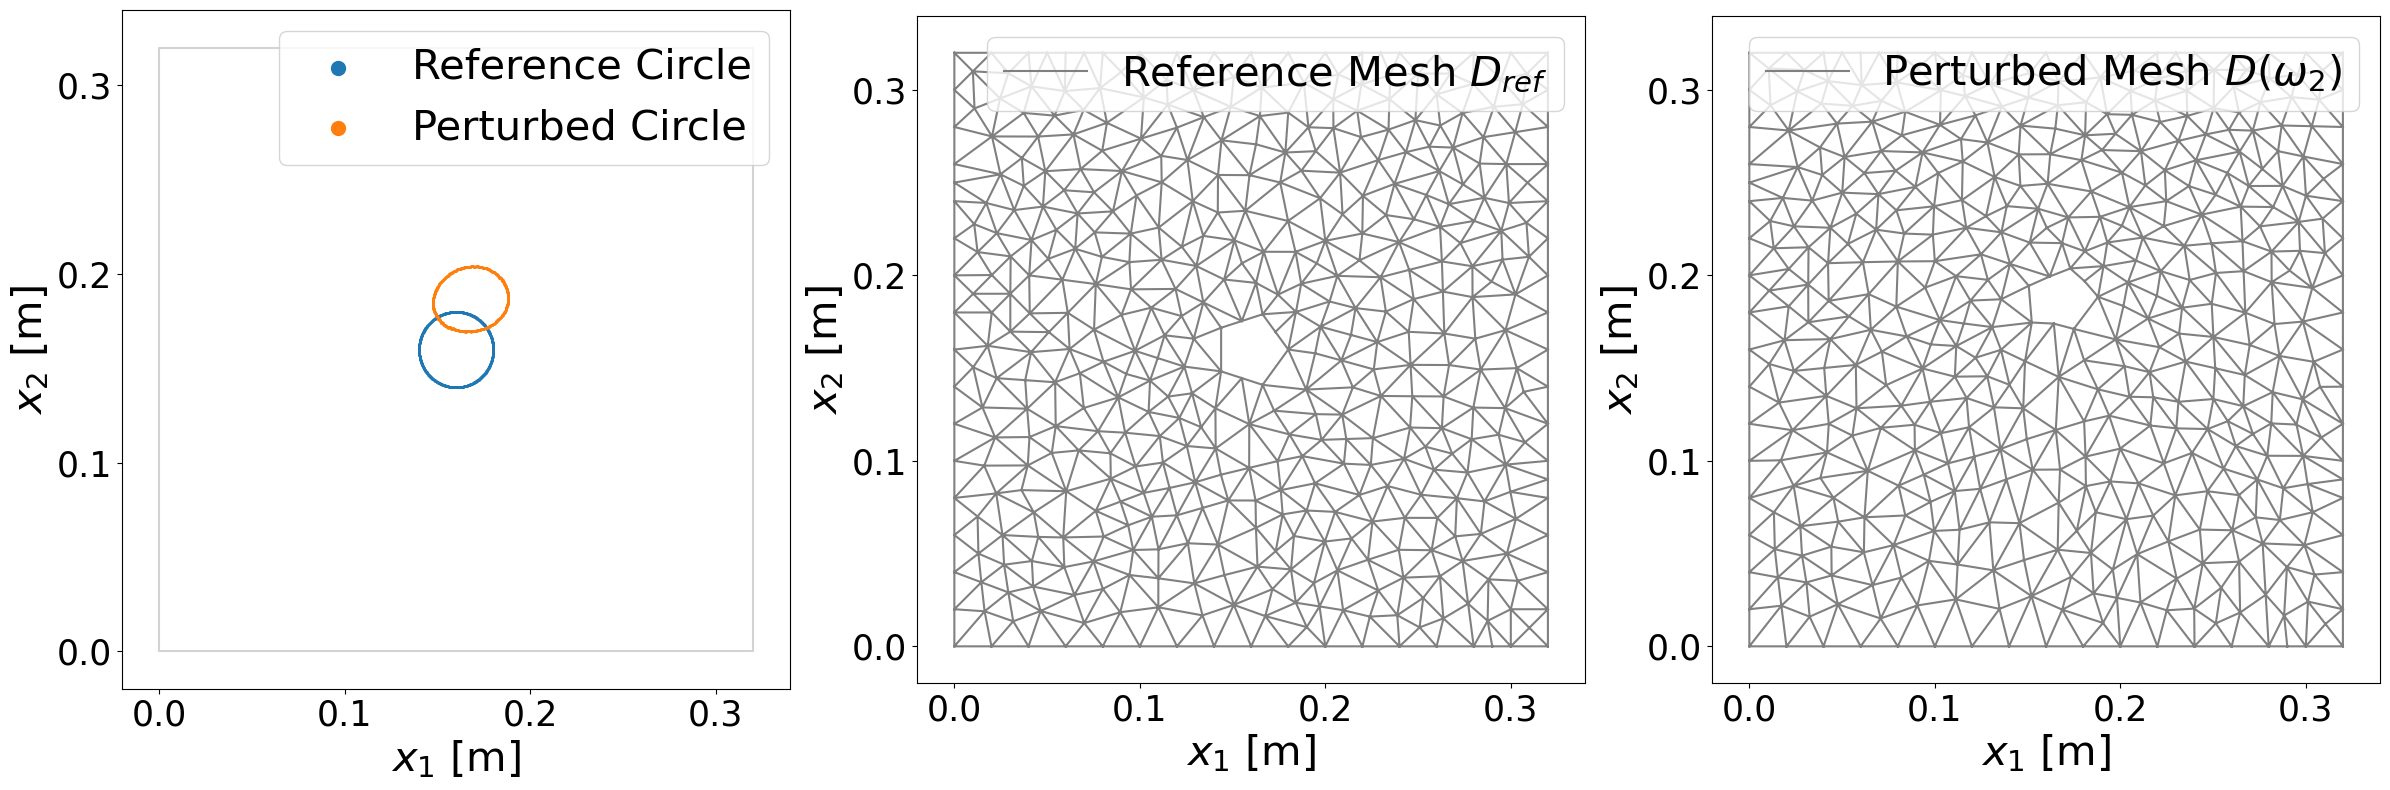

In [12]:
# plot name: steel_plate_grid_perturbation.png
# Takes about 7 Minutes

r = 0.02
mesh = create_reference_mesh(mesh_resolution)
perturbed_mesh = perturb_mesh(mesh, omega2, r, randomFieldVBar)

# Create points on the circle
thetas = np.linspace(0, 2 * np.pi, 500)
circle_points = np.array([0.16 + 0.02 * np.cos(thetas), 0.16 + 0.02 * np.sin(thetas)]).T
perturbed_circle_points = np.array([perturbation_function(circle_point, omega2, r, randomFieldVBar) for circle_point in circle_points])


# Plots
plt.figure(figsize=(24, 8))

# Plot circle and perturbed points
ax = plt.subplot(1, 3, 1)
plt.scatter(circle_points[:, 0], circle_points[:, 1], label='Reference Circle', s=1)
plt.scatter(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], label='Perturbed Circle', s=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30, markerscale=10)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 3, 2)
fe.plot(mesh, label=r'Reference Mesh $D_{ref}$')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 3, 3)
fe.plot(perturbed_mesh, label=r'Perturbed Mesh $D(\omega_2)$')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()


Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


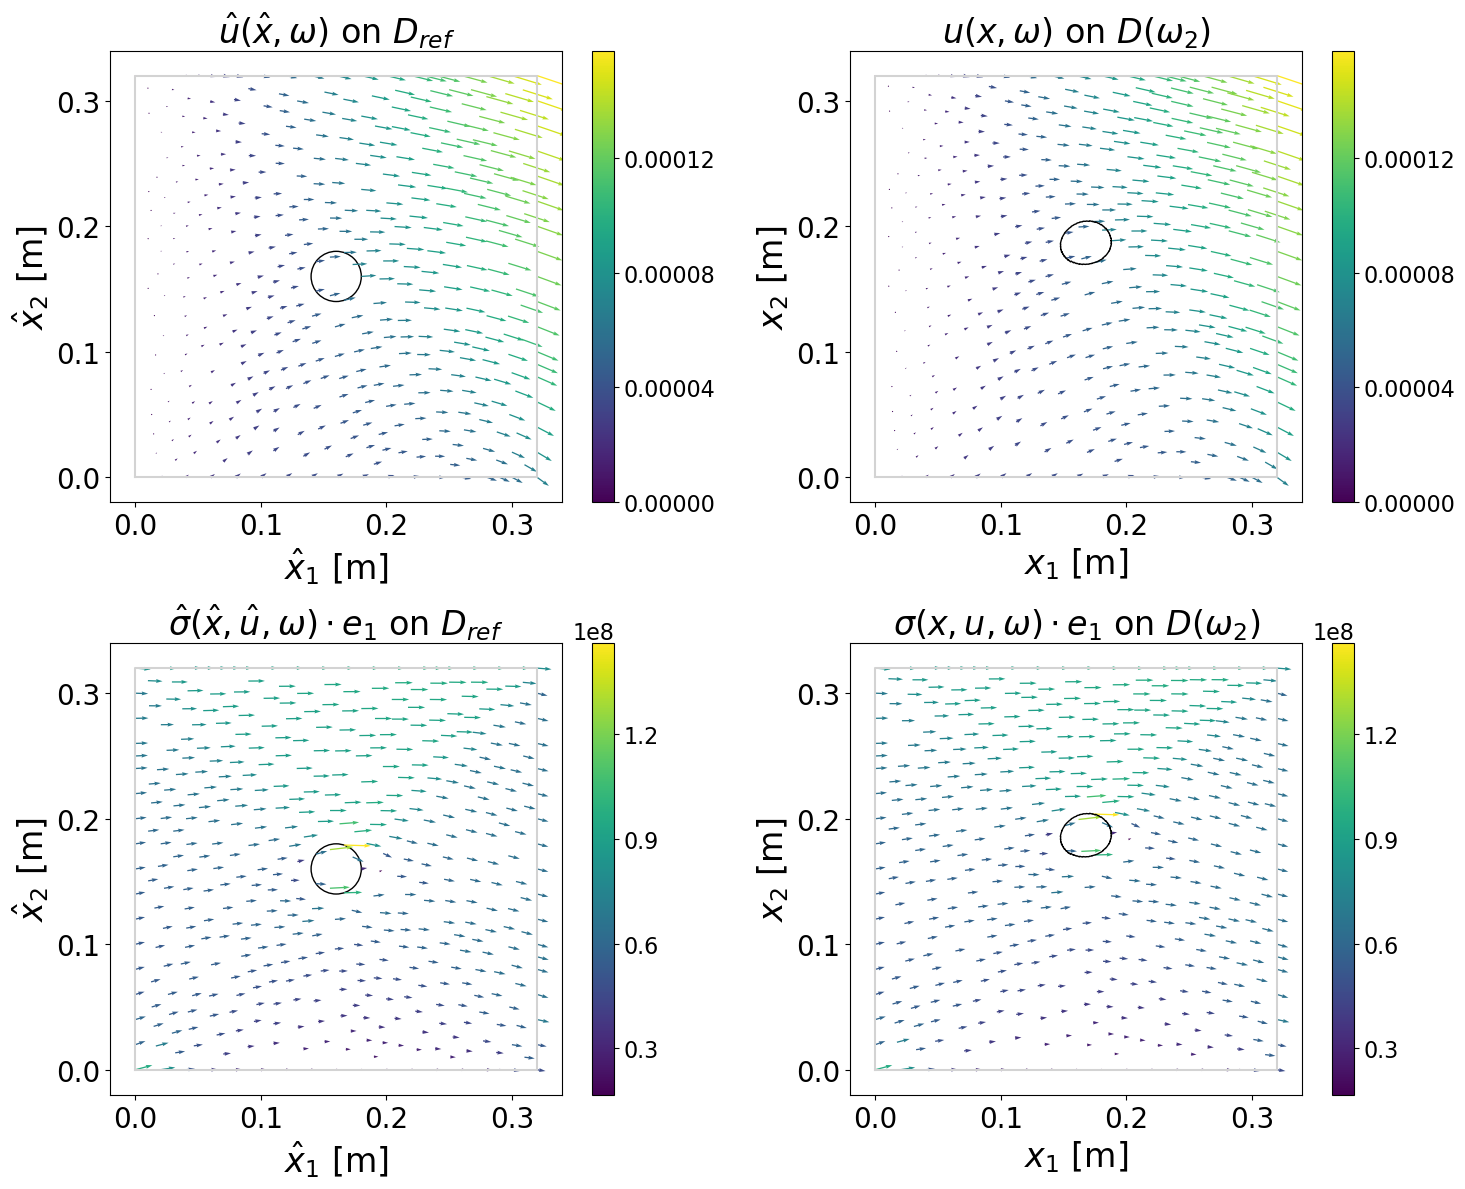

In [13]:
# Plot single sample results

u_hat_data, sigma_hat_data = solve_model(mesh_resolution, omega1, omega2, q, randomFieldE, randomFieldVBar)

mesh = create_reference_mesh(mesh_resolution)
perturbed_mesh = perturb_mesh(mesh, omega2, 0.02, randomFieldVBar)

V = fe.VectorFunctionSpace(mesh, 'P', 1)
V_sigma = fe.TensorFunctionSpace(mesh, 'P', 1)
V_pert = fe.VectorFunctionSpace(perturbed_mesh, 'P', 1)
V_sigma_pert = fe.TensorFunctionSpace(perturbed_mesh, 'P', 1)

u_hat = fe.Function(V)
u_hat.vector()[:] = u_hat_data
u = fe.Function(V_pert)
u.vector()[:] = u_hat_data
sigma_hat = fe.Function(V_sigma)
sigma_hat.vector()[:] = sigma_hat_data
sigma = fe.Function(V_sigma_pert)
sigma.vector()[:] = sigma_hat_data


# Plot
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# u_hat
ax = plt.subplot(2, 2, 1)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u_hat)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{u}(\hat{x}, \omega)$ on $D_{ref}$', fontsize=24)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# u
ax = plt.subplot(2, 2, 2)
plt.plot(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], color='black', linewidth=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$u(x, \omega)$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma_hat
ax = plt.subplot(2, 2, 3)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma_hat[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{\sigma}(\hat{x}, \hat{u}, \omega) \cdot e_1$ on $D_{ref}$', fontsize=24)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma
ax = plt.subplot(2, 2, 4)
plt.plot(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], color='black', linewidth=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\sigma(x, u, \omega) \cdot e_1$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()